In [1]:
import sys
import csv
import pandas as pd
import os

In [2]:
path= os.getcwd()
files= os.listdir(path)
files_xls= [f for f in files if f[-4:]== 'xlsx']
files_xls

    

['Arg_CA2019.xlsx',
 'Arg_CA2021.xlsx',
 'Bol_CA2019.xlsx',
 'Bol_CA2021.xlsx',
 'Bra_CA2019.xlsx',
 'Bra_CA2021.xlsx',
 'Chi_CA2019.xlsx',
 'Chi_CA2021.xlsx',
 'Col_CA2021.xlsx',
 'Ecu_CA2019.xlsx',
 'Ecu_CA2021.xlsx',
 'Par_CA2019.xlsx',
 'Par_CA2021.xlsx',
 'Per_CA2019.xlsx',
 'Per_CA2021.xlsx',
 'Uru_CA2019.xlsx',
 'Uru_CA2021.xlsx',
 'Ven_CA2019.xlsx',
 'Ven_CA2021.xlsx']

In [3]:
all_matches = pd.DataFrame()
for f in files_xls:
    data=pd.read_excel(f)
    all_matches = all_matches.append(data)

all_matches.shape

C:\Users\dhava\AppData\Local\Temp\ipykernel_10548\752172395.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_matches = all_matches.append(data)
C:\Users\dhava\AppData\Local\Temp\ipykernel_10548\752172395.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_matches = all_matches.append(data)
C:\Users\dhava\AppData\Local\Temp\ipykernel_10548\752172395.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_matches = all_matches.append(data)
C:\Users\dhava\AppData\Local\Temp\ipykernel_10548\752172395.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_matches = all_matches.append(data)
C:\Users\dhava\AppData\Local\Temp\ipyker

(183, 103)

In [4]:
all_matches.head(5)

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,...,CrdR,2CrdY,Fl_committed,Fl_Drawn,Offside_y,Own_Goal,Recoveries,Aerial_w,Aerail_L,Team
0,0,2019-03-22,21:00,Friendlies (M),Friendlies (M),Fri,Home,L,1,3,...,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,Argentina
1,1,2019-03-26,20:00,Friendlies (M),Friendlies (M),Tue,Away,W,1,0,...,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,Argentina
2,2,2019-06-07,21:10,Friendlies (M),Friendlies (M),Fri,Home,W,5,1,...,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,Argentina
3,3,2019-06-15,19:00,Copa América,Group stage,Sat,Neutral,L,0,2,...,0,0,13.0,17.0,1.0,0,47.0,12.0,14.0,Argentina
4,4,2019-06-19,21:30,Copa América,Group stage,Wed,Neutral,D,1,1,...,0,0,20.0,17.0,1.0,0,50.0,14.0,12.0,Argentina


In [5]:
all_matches.columns

Index(['Unnamed: 0', 'Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result',
       'GF', 'GA',
       ...
       'CrdR', '2CrdY', 'Fl_committed', 'Fl_Drawn', 'Offside_y', 'Own_Goal',
       'Recoveries', 'Aerial_w', 'Aerail_L', 'Team'],
      dtype='object', length=103)

In [6]:
all_matches.drop(columns='Unnamed: 0',inplace=True)
all_matches.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,CrdR,2CrdY,Fl_committed,Fl_Drawn,Offside_y,Own_Goal,Recoveries,Aerial_w,Aerail_L,Team
0,2019-03-22,21:00,Friendlies (M),Friendlies (M),Fri,Home,L,1,3,ve Venezuela,...,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,Argentina
1,2019-03-26,20:00,Friendlies (M),Friendlies (M),Tue,Away,W,1,0,ma Morocco,...,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,Argentina
2,2019-06-07,21:10,Friendlies (M),Friendlies (M),Fri,Home,W,5,1,ni Nicaragua,...,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,Argentina
3,2019-06-15,19:00,Copa América,Group stage,Sat,Neutral,L,0,2,co Colombia,...,0,0,13.0,17.0,1.0,0,47.0,12.0,14.0,Argentina
4,2019-06-19,21:30,Copa América,Group stage,Wed,Neutral,D,1,1,py Paraguay,...,0,0,20.0,17.0,1.0,0,50.0,14.0,12.0,Argentina


In [7]:
all_matches.dtypes

Date           object
Time           object
Comp           object
Round          object
Day            object
               ...   
Own_Goal        int64
Recoveries    float64
Aerial_w      float64
Aerail_L      float64
Team           object
Length: 102, dtype: object

In [8]:
all_matches["Date"] = pd.to_datetime(all_matches["Date"])
all_matches.dtypes

Date          datetime64[ns]
Time                  object
Comp                  object
Round                 object
Day                   object
                   ...      
Own_Goal               int64
Recoveries           float64
Aerial_w             float64
Aerail_L             float64
Team                  object
Length: 102, dtype: object

In [9]:
all_matches["venue_code"] = all_matches["Venue"].astype("category").cat.codes ### 1- Home,0- Away,2-Neutral
all_matches

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,2CrdY,Fl_committed,Fl_Drawn,Offside_y,Own_Goal,Recoveries,Aerial_w,Aerail_L,Team,venue_code
0,2019-03-22,21:00,Friendlies (M),Friendlies (M),Fri,Home,L,1,3,ve Venezuela,...,0,NaN,NaN,NaN,0,NaN,NaN,NaN,Argentina,1
1,2019-03-26,20:00,Friendlies (M),Friendlies (M),Tue,Away,W,1,0,ma Morocco,...,0,NaN,NaN,NaN,0,NaN,NaN,NaN,Argentina,0
2,2019-06-07,21:10,Friendlies (M),Friendlies (M),Fri,Home,W,5,1,ni Nicaragua,...,0,NaN,NaN,NaN,0,NaN,NaN,NaN,Argentina,1
3,2019-06-15,19:00,Copa América,Group stage,Sat,Neutral,L,0,2,co Colombia,...,0,13.0,17.0,1.0,0,47.0,12.0,14.0,Argentina,2
4,2019-06-19,21:30,Copa América,Group stage,Wed,Neutral,D,1,1,py Paraguay,...,0,20.0,17.0,1.0,0,50.0,14.0,12.0,Argentina,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,2019-11-19,19:25,Friendlies (M),Friendlies (M),Tue,Away,W,4,1,jp Japan,...,0,NaN,NaN,NaN,0,NaN,NaN,NaN,Venezuela,0
0,2021-06-13,18:00,Copa América,Group stage,Sun,Neutral,L,0,3,br Brazil,...,0,14.0,11.0,1.0,0,40.0,9.0,12.0,Venezuela,2
1,2021-06-17,18:00,Copa América,Group stage,Thu,Neutral,D,0,0,co Colombia,...,0,14.0,12.0,0.0,0,47.0,8.0,26.0,Venezuela,2
2,2021-06-20,18:00,Copa América,Group stage,Sun,Neutral,D,2,2,ec Ecuador,...,0,7.0,15.0,2.0,0,47.0,14.0,21.0,Venezuela,2


In [10]:
all_matches["opp_code"] = all_matches["Opponent"].astype("category").cat.codes

In [11]:
all_matches['year'] = all_matches['Date'].dt.year
all_matches

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Fl_Drawn,Offside_y,Own_Goal,Recoveries,Aerial_w,Aerail_L,Team,venue_code,opp_code,year
0,2019-03-22,21:00,Friendlies (M),Friendlies (M),Fri,Home,L,1,3,ve Venezuela,...,NaN,NaN,0,NaN,NaN,NaN,Argentina,1,35,2019
1,2019-03-26,20:00,Friendlies (M),Friendlies (M),Tue,Away,W,1,0,ma Morocco,...,NaN,NaN,0,NaN,NaN,NaN,Argentina,0,19,2019
2,2019-06-07,21:10,Friendlies (M),Friendlies (M),Fri,Home,W,5,1,ni Nicaragua,...,NaN,NaN,0,NaN,NaN,NaN,Argentina,1,22,2019
3,2019-06-15,19:00,Copa América,Group stage,Sat,Neutral,L,0,2,co Colombia,...,17.0,1.0,0,47.0,12.0,14.0,Argentina,2,5,2019
4,2019-06-19,21:30,Copa América,Group stage,Wed,Neutral,D,1,1,py Paraguay,...,17.0,1.0,0,50.0,14.0,12.0,Argentina,2,25,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,2019-11-19,19:25,Friendlies (M),Friendlies (M),Tue,Away,W,4,1,jp Japan,...,NaN,NaN,0,NaN,NaN,NaN,Venezuela,0,17,2019
0,2021-06-13,18:00,Copa América,Group stage,Sun,Neutral,L,0,3,br Brazil,...,11.0,1.0,0,40.0,9.0,12.0,Venezuela,2,3,2021
1,2021-06-17,18:00,Copa América,Group stage,Thu,Neutral,D,0,0,co Colombia,...,12.0,0.0,0,47.0,8.0,26.0,Venezuela,2,5,2021
2,2021-06-20,18:00,Copa América,Group stage,Sun,Neutral,D,2,2,ec Ecuador,...,15.0,2.0,0,47.0,14.0,21.0,Venezuela,2,9,2021


In [12]:
all_matches['target'] = (all_matches['Result'] == "W").astype("int")
all_matches 

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Offside_y,Own_Goal,Recoveries,Aerial_w,Aerail_L,Team,venue_code,opp_code,year,target
0,2019-03-22,21:00,Friendlies (M),Friendlies (M),Fri,Home,L,1,3,ve Venezuela,...,NaN,0,NaN,NaN,NaN,Argentina,1,35,2019,0
1,2019-03-26,20:00,Friendlies (M),Friendlies (M),Tue,Away,W,1,0,ma Morocco,...,NaN,0,NaN,NaN,NaN,Argentina,0,19,2019,1
2,2019-06-07,21:10,Friendlies (M),Friendlies (M),Fri,Home,W,5,1,ni Nicaragua,...,NaN,0,NaN,NaN,NaN,Argentina,1,22,2019,1
3,2019-06-15,19:00,Copa América,Group stage,Sat,Neutral,L,0,2,co Colombia,...,1.0,0,47.0,12.0,14.0,Argentina,2,5,2019,0
4,2019-06-19,21:30,Copa América,Group stage,Wed,Neutral,D,1,1,py Paraguay,...,1.0,0,50.0,14.0,12.0,Argentina,2,25,2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,2019-11-19,19:25,Friendlies (M),Friendlies (M),Tue,Away,W,4,1,jp Japan,...,NaN,0,NaN,NaN,NaN,Venezuela,0,17,2019,1
0,2021-06-13,18:00,Copa América,Group stage,Sun,Neutral,L,0,3,br Brazil,...,1.0,0,40.0,9.0,12.0,Venezuela,2,3,2021,0
1,2021-06-17,18:00,Copa América,Group stage,Thu,Neutral,D,0,0,co Colombia,...,0.0,0,47.0,8.0,26.0,Venezuela,2,5,2021,0
2,2021-06-20,18:00,Copa América,Group stage,Sun,Neutral,D,2,2,ec Ecuador,...,2.0,0,47.0,14.0,21.0,Venezuela,2,9,2021,0


In [13]:
all_matches.dtypes

Date          datetime64[ns]
Time                  object
Comp                  object
Round                 object
Day                   object
                   ...      
Team                  object
venue_code              int8
opp_code                int8
year                   int64
target                 int32
Length: 106, dtype: object

In [14]:
list(all_matches.select_dtypes(include='object').columns)

['Time',
 'Comp',
 'Round',
 'Day',
 'Venue',
 'Result',
 'GF',
 'GA',
 'Opponent',
 'Captain',
 'Formation',
 'Referee',
 'Match Report',
 'Notes',
 'Team']

In [15]:
all_matches['GF']=all_matches['GF'].str.slice(0,3)
all_matches['GA']=all_matches['GA'].str.slice(0,3)

In [18]:
def clean_scores(value):
    # Convert the value to string
    value_str = str(value)
    # Remove any non-numeric characters
    cleaned_value = ''.join(filter(str.isdigit, value_str))
    # If the cleaned value is empty, return NaN or a default value
    return int(cleaned_value) if cleaned_value else 0

In [19]:
all_matches['GF'] = all_matches['GF'].apply(clean_scores)
all_matches['GA']=all_matches['GA'].apply(clean_scores)

In [29]:
all_matches.fillna(0, inplace=True)

## Base Model

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf=RandomForestClassifier(n_estimators=50,min_samples_split=10,random_state=100)

In [30]:
train = all_matches[all_matches["year"] == 2019]

In [31]:
test=all_matches[all_matches["year"]== 2021]

In [ ]:
#dropped_cols= ['Date','Time','Comp', 'Round', 'Day', 'Venue', 'Result','Opponent','xG','xGA','Poss','Attendance','Captain','Formation','Referee','Match Report','Notes','Team','target']

In [24]:
from sklearn.metrics import accuracy_score

In [32]:
x=train.drop(columns=['Date','Time','Comp', 'Round', 'Day', 'Venue', 'Result','Opponent','xG','xGA','Poss','Attendance','Captain','Formation','Referee','Match Report','Notes','Team','target'])
x.shape

(118, 91)

In [33]:
y=train[['target']]
y.shape

(118, 1)

In [34]:
x_test=test.drop(columns=['Date','Time','Comp', 'Round', 'Day', 'Venue', 'Result','Opponent','xG','xGA','Poss','Attendance','Captain','Formation','Referee','Match Report','Notes','Team','target'])
y_test=test[['target']]

In [35]:
rf.fit(x,y)

C:\Users\dhava\AppData\Local\Temp\ipykernel_10548\2439990766.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x,y)


RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=100)

In [36]:
y_pred=rf.predict(x_test)

In [38]:
print("ACCURACY OF THE MODEL:",accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL: 0.7076923076923077


In [50]:
import matplotlib.pyplot as plt

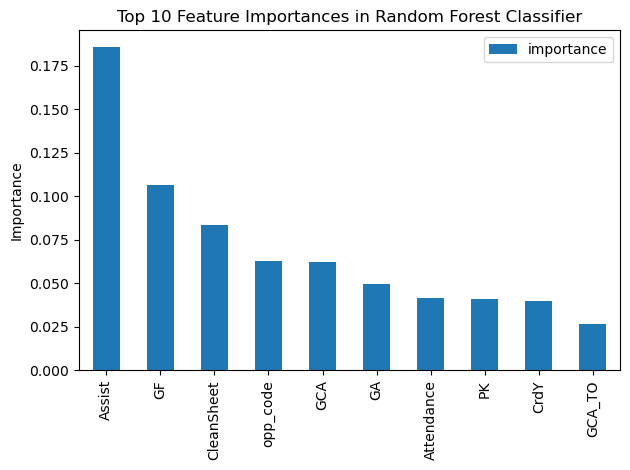

In [57]:
fig, ax = plt.subplots()
top_10_features.plot.bar(yerr=None, ax=ax)
ax.set_title("Top 10 Feature Importances in Random Forest Classifier")
ax.set_ylabel("Importance")
fig.tight_layout()
plt.show()

## Feature Engineering

In [61]:
### Shooting metrics
all_matches['Shot_onTarget%']= round((all_matches['Shot_oTarget'] / all_matches['Tot_Shot'])*100,2)
all_matches['Shot_onTarget%'] = all_matches['Shot_onTarget%'].fillna(0)

all_matches['Goals_per_Shot']= (all_matches['GF'] / all_matches['Tot_Shot'])
all_matches['Goals_per_Shot'] = all_matches['Goals_per_Shot'].fillna(0)

all_matches['Goals_per_ShotonTarget']= (all_matches['GF'] / all_matches['Shot_oTarget'])
all_matches['Goals_per_ShotonTarget'] = all_matches['Goals_per_ShotonTarget'].fillna(0)

all_matches['Penalty_conversion']= (all_matches['PK'] / all_matches['PKattempted'])
all_matches['Penalty_conversion'] = all_matches['Penalty_conversion'].fillna(0)

In [ ]:
### GoalKeeping Score

all_matches['Save%'] = round(((all_matches['SoTA']-all_matches['GA']) / (all_matches['SoTA'])) *100,2)
all_matches['Save%']= all_matches['Save%'].fillna(0)

all_matches['PK_saved%'] = round((all_matches['PKsv'] / all_matches['Opp_PKatt']) *100,2)
all_matches['PK_saved%'] = all_matches['PK_saved%'].fillna(0)

all_matches['Crs_saved%'] = round((all_matches['CRSStop'] / all_matches['Opp_crsPA']) *100,2)
all_matches['Crs_saved%'] = all_matches['Crs_saved%'].fillna(0)